In [61]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.rdMolDescriptors import CalcExactMolWt, CalcMolFormula
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
fs=9
plt.rcParams.update({'font.size': fs})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']

In [62]:
df = pd.read_pickle('../data/neims/spec_files/df_neims_gecko_3_9_22.pkl')

In [63]:
mol_name = 'gecko_119052' 
formula = 'C10H13N3O14'	
smiles = 'CC(=O)C(CC(O[N+](=O)[O-])(C(=O)O)C(C)(C)C(=O)OO[N+](=O)[O-])O[N+](=O)[O-]'
print(smiles)

CC(=O)C(CC(O[N+](=O)[O-])(C(=O)O)C(C)(C)C(=O)OO[N+](=O)[O-])O[N+](=O)[O-]


In [64]:
df[df['SMILES'] == smiles]['spec'].values[0]

array([[ 14,  29],
       [ 15,  42],
       [ 16,  38],
       [ 26,  30],
       [ 27,  65],
       [ 28,  83],
       [ 29, 237],
       [ 30, 337],
       [ 31,  76],
       [ 33,   3],
       [ 36,  21],
       [ 37,   1],
       [ 38,  73],
       [ 39, 123],
       [ 40, 171],
       [ 41, 323],
       [ 42, 348],
       [ 43, 999],
       [ 44, 342],
       [ 45, 257],
       [ 46, 418],
       [ 47, 145],
       [ 50,  74],
       [ 51,   4],
       [ 54, 122],
       [ 55,  60],
       [ 56, 135],
       [ 57, 426],
       [ 58, 171],
       [ 59, 105],
       [ 60,   2],
       [ 61,  46],
       [ 62,  52],
       [ 63, 106],
       [ 64, 104],
       [ 67,  42],
       [ 68,  67],
       [ 69, 415],
       [ 70, 115],
       [ 71, 111],
       [ 72,  60],
       [ 73, 152],
       [ 74, 194],
       [ 75, 133],
       [ 76, 165],
       [ 77,  89],
       [ 78, 100],
       [ 80,  24],
       [ 81, 102],
       [ 82, 136],
       [ 83,  79],
       [ 84,  31],
       [ 85,

In [65]:
spec = df[df['SMILES'] == smiles]['spec'].values[0].T
mz = spec[0, :]
inten = spec[1, :]
inten_log = np.log10(inten)
print(mz[0:10], inten[0:10])
print(mz[70:90])

[14 15 16 26 27 28 29 30 31 33] [ 29  42  38  30  65  83 237 337  76   3]
[110 111 112 114 120 122 123 124 127 136 137 139 142 143 146 150 151 152
 153 154]


In [66]:
max_idx = np.argmax(inten)
idx = np.where(mz==57)[0][0]
print(idx)
spread = 2
print(mz[idx-spread:idx+spread], inten[idx-spread:idx+spread])
mz[max_idx]
print(mz)

27
[55 56 57 58] [ 60 135 426 171]
[ 14  15  16  26  27  28  29  30  31  33  36  37  38  39  40  41  42  43
  44  45  46  47  50  51  54  55  56  57  58  59  60  61  62  63  64  67
  68  69  70  71  72  73  74  75  76  77  78  80  81  82  83  84  85  86
  87  88  89  91  93  97  98  99 100 101 102 103 104 105 106 109 110 111
 112 114 120 122 123 124 127 136 137 139 142 143 146 150 151 152 153 154
 163 164 165 171 172 180 192 193 196 236 354]


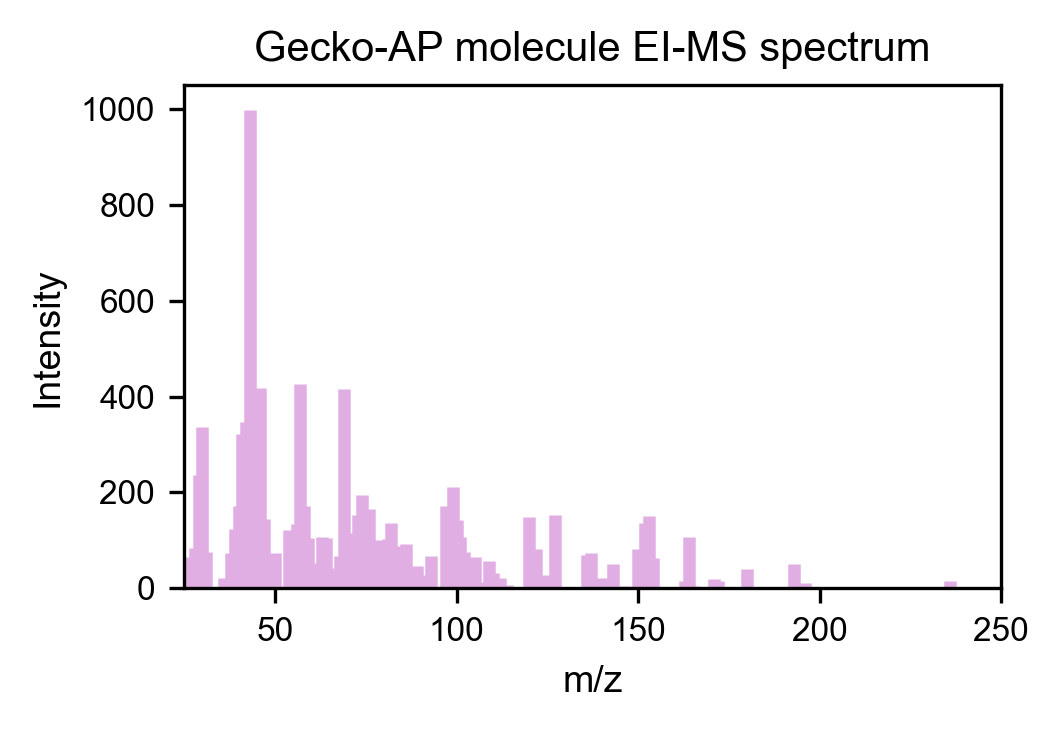

In [67]:
inten_scaled = inten / inten.max()

plt.figure(figsize=(3.6, 2.5),dpi=300)
plt.vlines(mz, 0, inten, color='#e1aee4', linewidth=3)
plt.xlabel('m/z')
plt.ylabel('Intensity')
plt.xlim([25,250])
plt.yticks(fontsize=fs-1)
plt.xticks(fontsize=fs-1)
plt.ylim([0,1050])
plt.title(r'Gecko-AP molecule EI-MS spectrum', fontsize=fs+1)
plt.tight_layout()
plt.savefig(f'figs/Gecko119052_spec.svg')
plt.show()

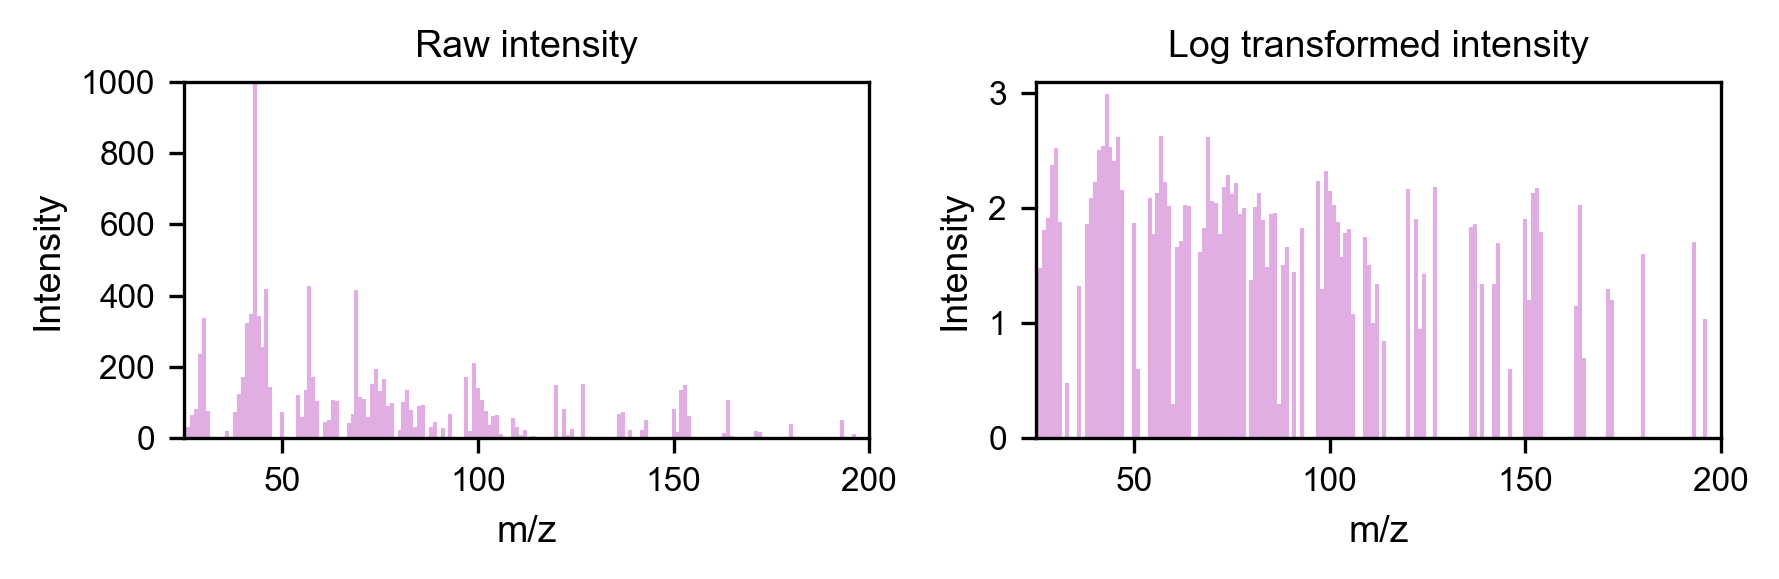

In [78]:
inten_log_scaled = inten_log / inten_log.max()
fig, axes = plt.subplots(1, 2, figsize=(6, 2), dpi=300, sharex=True)

# Linear spectrum
axes[0].vlines(mz, 0, inten, color='#e1aee4', linewidth=1)
axes[0].set_xlabel('m/z')
axes[0].set_ylabel('Intensity')
axes[0].set_xlim([25, 200])
axes[0].set_ylim([0, 1000])
axes[0].set_title(r'Raw intensity', fontsize=fs)

# Log spectrum
axes[1].vlines(mz, 0, inten_log, color='#e1aee4', linewidth=1)
axes[1].set_xlabel('m/z')
axes[1].set_ylabel('Intensity')
#axes[1].set_yscale('log')
axes[1].set_xlim([25, 200])
axes[1].set_ylim([0, 3.1])  # adjust min value to avoid log(0)
axes[1].set_title(r'Log transformed intensity', fontsize=fs)

# Global settings
for ax in axes:
    ax.tick_params(axis='x', labelsize=fs-1)
    ax.tick_params(axis='y', labelsize=fs-1)

#fig.suptitle(r'Gecko #119052 ($\mathrm{C}_{10}\mathrm{H}_{13}\mathrm{N}_3\mathrm{O}_{14}$)', fontsize=fs+1)
fig.tight_layout()

plt.savefig('figs/Gecko119052_spec_side_by_side.svg')
plt.show()

27


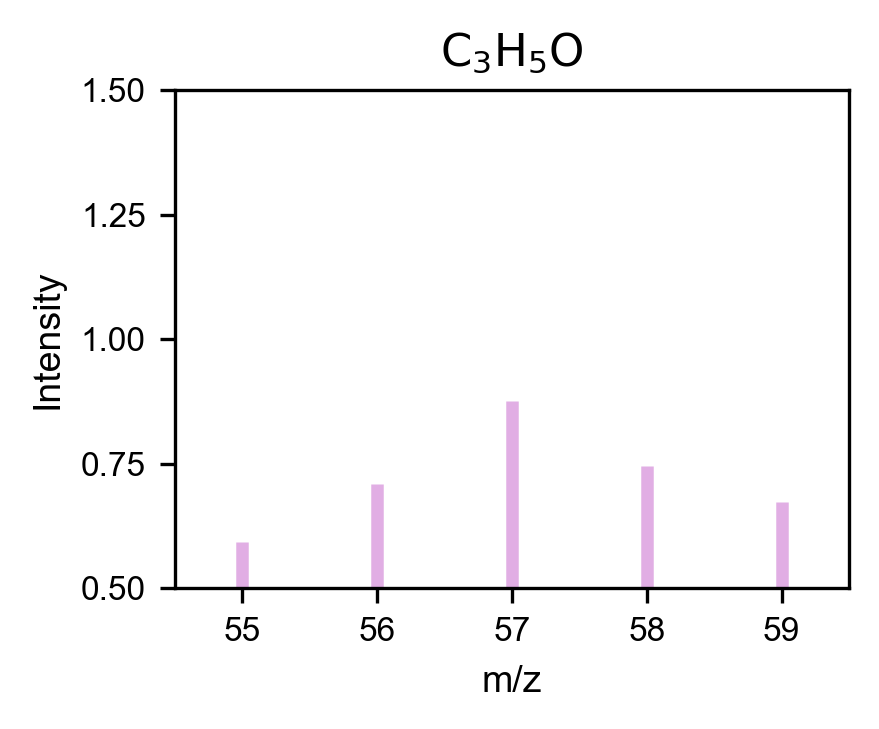

In [69]:
max_idx = np.argmax(inten)
idx = np.where(mz==57)[0][0]
print(idx)
spread = 2
#mz_zoom, inten_zoom = mz[idx-spread:idx+spread], inten_log_scaled[idx-spread:idx+spread]


plt.figure(figsize=(3, 2.5),dpi=300)
plt.vlines(mz, 0, inten_log_scaled, color='#e1aee4', linewidth=3)
plt.xlabel('m/z')
plt.ylabel('Intensity')
plt.xlim([54.5,59.5])
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5], fontsize=fs-1)
plt.xticks(np.linspace(55, 59, 5), fontsize=fs-1)
plt.ylim([0.5,1.5])
#plt.title(r'Gecko #119052 spectrum ($\mathrm{C}_{10}\mathrm{H}_{13}\mathrm{N}_3\mathrm{O}_{14}$)', fontsize=fs+1)
plt.title(r'$\mathrm{C}_{3} \mathrm{H}_{5} \mathrm{O}$')
plt.tight_layout()
plt.savefig(f'figs/Gecko119052_spec_zoom.png', dpi=600)
plt.show()

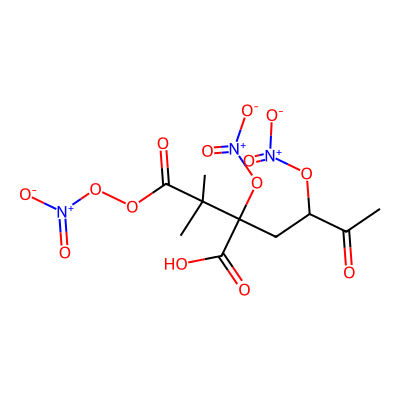

In [70]:
mol = Chem.MolFromSmiles(smiles)
img_large = Draw.MolToImage(mol, size=(400, 400))
img_large.save(f'figs/{mol_name}.png')
img_large

C3H5O+: 57.03349120009


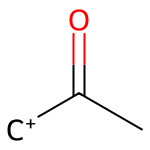

In [71]:
frag_smiles = '[CH2+]C(=O)[CH3]'
frag_mol = Chem.MolFromSmiles(frag_smiles)
#frag_mol = Chem.AddHs(frag_mol, explicitOnly=True)
print(f'{CalcMolFormula(frag_mol)}: {CalcExactMolWt(frag_mol)}')
frag_img_large = Draw.MolToImage(frag_mol, size=(150, 150))
frag_img_large.save(f'figs/frag.png')
frag_img_large

C3H5O+: 57.03349120009


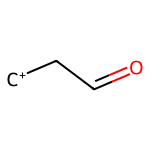

In [72]:
frag_smiles = '[CH2+]CC=O'   
frag_mol = Chem.MolFromSmiles(frag_smiles)
#frag_mol = Chem.AddHs(frag_mol, explicitOnly=True)
print(f'{CalcMolFormula(frag_mol)}: {CalcExactMolWt(frag_mol)}')
frag_img_large = Draw.MolToImage(frag_mol, size=(150, 150))
frag_img_large.save(f'figs/frag_2.png')
frag_img_large

C3H5O+: 57.03349120009


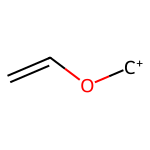

In [73]:
frag_smiles = 'C=CO[CH2+]'   
frag_mol = Chem.MolFromSmiles(frag_smiles)
#frag_mol = Chem.AddHs(frag_mol, explicitOnly=True)
print(f'{CalcMolFormula(frag_mol)}: {CalcExactMolWt(frag_mol)}')
frag_img_large = Draw.MolToImage(frag_mol, size=(150, 150))
frag_img_large.save(f'figs/frag_3.png')
frag_img_large

C3H5O+2: 57.032942620179995


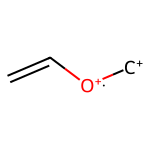

In [74]:
frag_smiles = 'C=C[O+][CH2+]'   
frag_mol = Chem.MolFromSmiles(frag_smiles)
#frag_mol = Chem.AddHs(frag_mol, explicitOnly=True)
print(f'{CalcMolFormula(frag_mol)}: {CalcExactMolWt(frag_mol)}')
frag_img_large = Draw.MolToImage(frag_mol, size=(150, 150))
frag_img_large.save(f'figs/frag_4.png')
frag_img_large

133.037507704


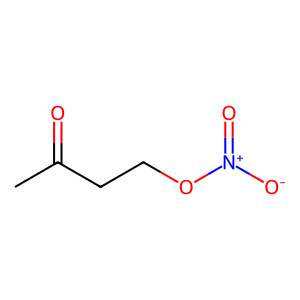

In [75]:
frag_smiles = 'CC(=O)C(C(O[N+](=O)[O-]))'
frag_mol = Chem.MolFromSmiles(frag_smiles)
#frag_mol = Chem.AddHs(frag_mol, explicitOnly=True)
print(CalcExactMolWt(frag_mol))
frag_img_large = Draw.MolToImage(frag_mol, size=(300, 300))
frag_img_large

C10H13N3O14: 399.0397520959999


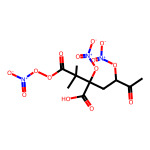

In [76]:
frag_mol = Chem.MolFromSmiles(smiles)
#frag_mol = Chem.AddHs(frag_mol, explicitOnly=True)
print(f'{CalcMolFormula(frag_mol)}: {CalcExactMolWt(frag_mol)}')
frag_img_large = Draw.MolToImage(frag_mol, size=(150, 150))
frag_img_large